In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

### read data from a csv file in to numpy arrays
file_name = 'SDS00004.csv' #put your file name here
df = pd.read_csv(file_name, skiprows=11, delimiter=",", index_col=False)
df.rename(columns={'Second': 'time', 'Volt': 'ch1', 'Volt.1': 'ch2'}, inplace=True)

In [2]:
df['time (ms)'] = df['time'] * 1000

In [3]:
df['V_i (mV)'] = df["ch2"]
df['V_s (uV)'] = df["ch1"] * 100
df["I (uA)"] = df["V_i (mV)"] * 100

In [4]:
df.head()

,time,ch1,ch2,time (ms),V_i (mV),V_s (uV),I (uA)
0,0.04200,-3.80,-3.34,42.00,-3.34,-380.0,-334.0
1,0.04201,-3.80,-3.38,42.01,-3.38,-380.0,-338.0
2,0.04202,-3.84,-3.38,42.02,-3.38,-384.0,-338.0
3,0.04203,-3.80,-3.38,42.03,-3.38,-380.0,-338.0
4,0.04204,-3.88,-3.42,42.04,-3.42,-388.0,-342.0


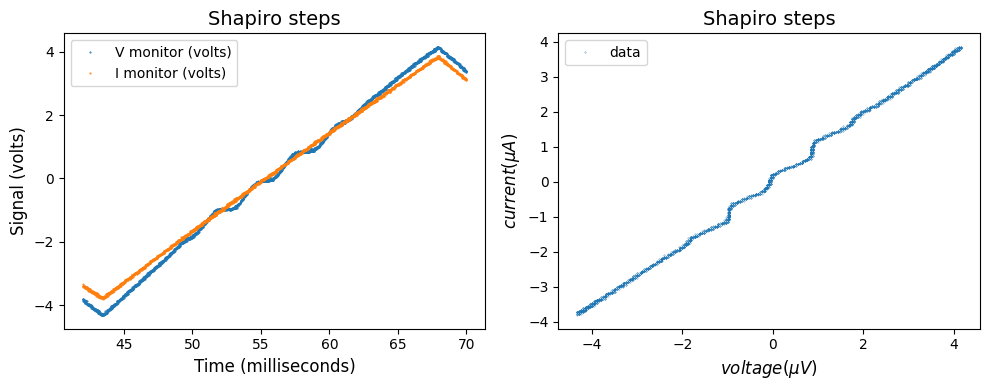

In [15]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot 1: Sine wave
axes[0].plot(df["time (ms)"], df["ch1"], '.', color ='C0', markersize=1, label='V monitor (volts)')
axes[0].plot(df["time (ms)"], df["ch2"], '.', color ='C1', markersize=1, label='I monitor (volts)')
axes[0].set_xlabel('Time (milliseconds)', fontsize=12)
axes[0].set_ylabel('Signal (volts)', fontsize=12)
axes[0].set_title('Shapiro steps', fontsize=14)
# axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(loc='best')


axes[1].plot(df['ch1'], df["ch2"], '.', markersize=0.5, label='data', color='C0')
axes[1].set_xlabel(r'$voltage (\mu V)$', fontsize=12)
axes[1].set_ylabel(r'$current (\mu A)$', fontsize=12)
axes[1].set_title('Shapiro steps', fontsize=14)
# axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend(loc='best')


# Adjust layout so titles and labels don't overlap
plt.tight_layout()
# plt.savefig('count_vs_current.png', dpi=300) 
# Show the plot
plt.show()


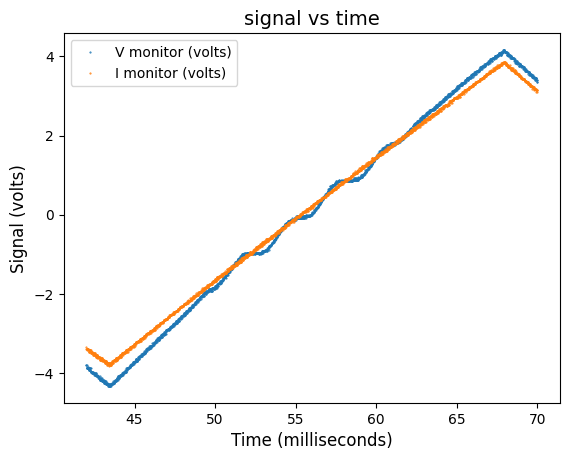

In [16]:
plt.plot(df["time (ms)"], df["ch1"], '.', color ='C0', markersize=1, label='V monitor (volts)')
plt.plot(df["time (ms)"], df["ch2"], '.', color ='C1', markersize=1, label='I monitor (volts)')
plt.xlabel('Time (milliseconds)', fontsize=12)
plt.ylabel('Signal (volts)', fontsize=12)
plt.title('signal vs time', fontsize=14)
# axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.savefig('shapiro_signal.png', dpi=300) 

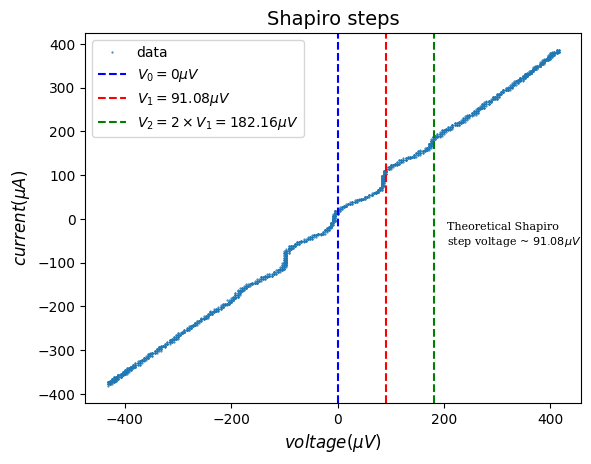

In [83]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 8,
        }

plt.plot(df['V_s (uV)'], df["I (uA)"], '.', markersize=1, label='data', color='C0')


plt.axvline(x=0, color='blue', linestyle='--', label=f'$V_0 = 0 \mu V$')
plt.axvline(x=91.08, color='red', linestyle='--', label=f'$V_1 = 91.08 \mu V$')
plt.axvline(x=182.16, color='green', linestyle='--', label=f'$V_2 = 2 \\times V_1 = 182.16 \mu V$')

plt.text(205, -25, r"Theoretical Shapiro", fontdict=font)
plt.text(205, -60, r"step voltage ~ $91.08 \mu V$", fontdict=font)
plt.xlabel(r'$voltage (\mu V)$', fontsize=12)
plt.ylabel(r'$current (\mu A)$', fontsize=12)
plt.title('Shapiro steps', fontsize=14)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.savefig('shapiro_steps.png', dpi=300)